In [1]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st

In [2]:
# Параметры
a = 0  # математическое ожидание
sigma2 = 2  # дисперсия
sigma = np.sqrt(sigma2)  # стандартное отклонение
gamma = 0.91  # доверительная вероятность
n = 20  # объем выборки
M = 1750  # количество выборок
k = 140  # количество выборок для случайной величины W


In [3]:
# 1.1 Интервальная оценка для математического ожидания при известной дисперсии
X = np.random.normal(a, sigma, size=n)
t_gamma = st.norm.ppf(1/2 + gamma/2)
a_left_known = X.mean() - sigma * t_gamma / np.sqrt(n)
a_right_known = X.mean() + sigma * t_gamma / np.sqrt(n)
print("1.1. Доверительный интервал (известная дисперсия):", (a_left_known, a_right_known))

print("1.1. Доверительный интервал (известная дисперсия, метод interval): ", st.norm.interval(confidence=gamma, loc=X.mean(), scale=sigma/np.sqrt(n)))


1.1. Доверительный интервал (известная дисперсия): (-1.0251680607782505, 0.047095600080589994)
1.1. Доверительный интервал (известная дисперсия, метод interval):  (-1.0251680607782503, 0.04709560008058988)


In [4]:
# 1.2 Интервальная оценка для математического ожидания при неизвестной дисперсии
a_estimate = np.mean(X)
sigma_estimate = np.std(X, ddof=1)
t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
print("1.2. Доверительный интервал (неизвестная дисперсия):", (a_left_unknown, a_right_unknown))
print("1.2. Доверительный интервал (неизвестная дисперсия, метод interval): ", st.t.interval(confidence=gamma, loc=a_estimate, scale=sigma_estimate/np.sqrt(n), df=n-1))


1.2. Доверительный интервал (неизвестная дисперсия): (-0.9647777389207799, -0.01329472177688068)
1.2. Доверительный интервал (неизвестная дисперсия, метод interval):  (-0.9647777389207797, -0.01329472177688068)


In [5]:
# 1.3 Интервальная оценка для дисперсии
delta_0 = st.chi2.ppf(1/2 + gamma/2, df=n-1)
delta_1 = st.chi2.ppf(1/2 - gamma/2, df=n-1)
s2 = np.var(X, ddof=1)
sigma2_left = (n - 1) * s2 / delta_0
sigma2_right = (n - 1) * s2 / delta_1
print("1.3. Доверительный интервал для дисперсии:", (sigma2_left, sigma2_right))


1.3. Доверительный интервал для дисперсии: (0.8816428748587973, 2.717979592113248)


In [6]:
# 2. Зависимость длины доверительного интервала от надежности
V = 500
gamma_values = np.linspace(0.7, 0.999, V)
interval_lengths_mx = []
interval_lengths_var = []
interval_lengths_mx_unknown = []

for g in gamma_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)

    interval_lengths_mx_unknown.append(interval_mx_unknown)
    interval_lengths_mx.append(interval_mx)
    interval_lengths_var.append(interval_var)


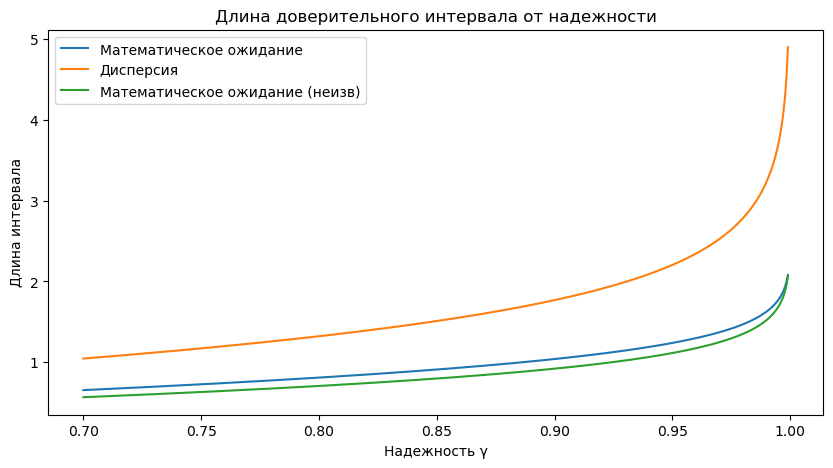

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(gamma_values, interval_lengths_mx, label="Математическое ожидание")
plt.plot(gamma_values, interval_lengths_var, label="Дисперсия")
plt.plot(gamma_values, interval_lengths_mx_unknown, label="Математическое ожидание (неизв)")
plt.xlabel("Надежность γ")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от надежности")
plt.show()

In [8]:
# 3. Зависимость длины интервала от объема выборки
n_values = range(5, 51)
lengths_mx = []
lengths_mx_unk = []
lengths_var = []

for n in n_values:
    t_gamma_unkn = st.t.ppf(1/2 + g/2, df=n-1)
    interval_mx_unknown = 2 * sigma_estimate * t_gamma_unkn / np.sqrt(n)
    t_gamma = st.norm.ppf(1/2 + g/2)
    interval_mx = 2 * sigma * t_gamma / np.sqrt(n)
    delta_0 = st.chi2.ppf(1/2 + g/2, df=n-1)
    delta_1 = st.chi2.ppf(1/2 - g/2, df=n-1)
    interval_var = (n - 1) * s2 * (1/delta_1 - 1/delta_0)
    lengths_mx_unk.append(interval_mx_unknown)
    lengths_mx.append(interval_mx)
    lengths_var.append(interval_var)

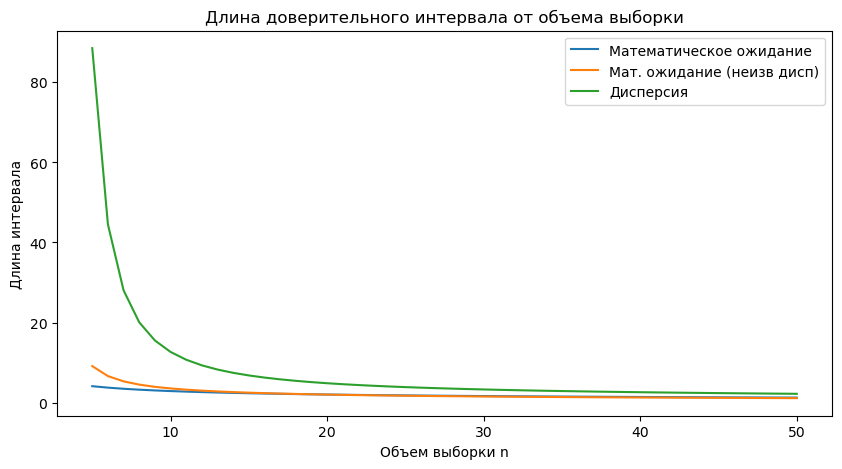

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, lengths_mx, label="Математическое ожидание")
plt.plot(n_values, lengths_mx_unk, label="Мат. ожидание (неизв дисп)")
plt.plot(n_values, lengths_var, label="Дисперсия")
plt.xlabel("Объем выборки n")
plt.ylabel("Длина интервала")
plt.legend()
plt.title("Длина доверительного интервала от объема выборки")
plt.show()

In [10]:
# 4. Оценка γ* при неизвестной дисперсии
count_gamma = 0
confidence_array = []

for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s = np.std(X, ddof=1)
    t_gamma_unknown = st.t.ppf(1/2 + gamma/2, df=n-1)
    a_left_unknown = X.mean() - sigma_estimate * t_gamma_unknown / np.sqrt(n)
    a_right_unknown = X.mean() + sigma_estimate * t_gamma_unknown / np.sqrt(n)
    confidence_array.append((a_left_unknown, a_right_unknown))
    if a_left_unknown <= a <= a_right_unknown:
        count_gamma +=1


print("Доверительный интервал для каждой из M выборок: ")
print(confidence_array)
gamma_star = count_gamma / M
print("4. Фактическая γ*:", gamma_star)

Доверительный интервал для каждой из M выборок: 
[(-0.5076005722272017, 0.07502571565173699), (-0.20461244211483937, 0.3780138457640993), (-0.25153785892608593, 0.33108842895285273), (-0.3818390225971563, 0.20078726528178237), (0.14252893169650965, 0.7251552195754483), (-0.6802002600379573, -0.09757397215901864), (-0.03335821953970264, 0.549268068339236), (-0.07062973076016132, 0.5119965571187773), (-0.33483803151097313, 0.24778825636796556), (-0.05526675385113983, 0.5273595340277988), (-0.049826927007202676, 0.532799360871736), (-0.5213538732283889, 0.06127241465054972), (-0.832471178290979, -0.24984489041204044), (-0.01674524472120359, 0.565881043157735), (-0.23391470148758892, 0.34871158639134975), (-0.12228434222303985, 0.4603419456558988), (-0.5925431481907621, -0.009916860311823483), (-0.33778038115444586, 0.24484590672449277), (0.11763026892087441, 0.7002565567998131), (-0.06607680942554942, 0.5165494784533893), (-0.4421434186043487, 0.14048286927458994), (-0.5975882274001507, -

In [11]:
# 5. Анализ случайной величины Z
Z_values = []
for _ in range(M):
    X = np.random.normal(a, sigma, size=n)
    s_2 = np.var(X, ddof=1)
    Z = (X.mean() - a) / (np.sqrt(s_2) / np.sqrt(n))
    Z_values.append(Z)
Z_values


[0.07105088303277264,
 2.2429663877840924,
 0.381076122293496,
 -1.0326863807140307,
 -1.5588670149934998,
 0.6938560846484347,
 -0.47153723894000477,
 1.182008505094684,
 -1.0349470002240246,
 1.1189015888272522,
 0.17302141521444783,
 -1.2348823243045344,
 1.1108079250594847,
 -0.35528093668081095,
 -2.0918691430442404,
 -2.631753549266221,
 -0.3542816072346593,
 -1.9523458692745876,
 -0.16784770121265305,
 1.0099924194587822,
 1.5021504056211947,
 -0.37599738852307146,
 0.011977210026033192,
 -0.5832941009992841,
 0.3122745435590212,
 0.7621153958672967,
 -0.5669604436603607,
 1.6313354116365477,
 -0.2611477533652178,
 -1.302677711435167,
 -0.44253372213481224,
 -0.7099564338257507,
 -0.38177211218355533,
 0.2692103223731796,
 -1.4009512288511965,
 -2.2995330162108107,
 -0.34563471704560983,
 0.9934824305210861,
 0.43424607750238264,
 -1.9708009764687344,
 -0.48513196347792314,
 0.2028608647304991,
 1.7479043957140175,
 -1.0195714630572728,
 -1.3543337197039667,
 0.39195770516916567

In [12]:
# 5.1 Вычисление характеристик
mean_Z = np.mean(Z_values)
var_Z = np.var(Z_values, ddof=1)
skew_Z = st.skew(Z_values)
kurt_Z = st.kurtosis(Z_values)
print(f"Среднее: {mean_Z}")
print(f"Дисперсия: {var_Z}")
print(f"Асимметрия: {skew_Z}")
print(f"Эксцесс: {kurt_Z}")

Среднее: 0.037296233894230015
Дисперсия: 1.037348576794237
Асимметрия: 0.03254854621016878
Эксцесс: 0.1912718381378582


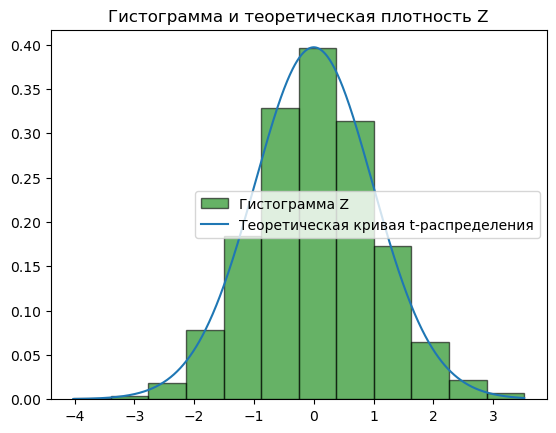

In [13]:
# 5.2 Построение графиков
plt.hist(Z_values, bins="sturges", density=True, alpha=0.6, color='g', edgecolor = 'black', label="Гистограмма Z")
x = np.linspace(min(Z_values), max(Z_values), 1000)
plt.plot(x, st.t.pdf(x, df=n-1), label="Теоретическая кривая t-распределения")
plt.legend()
plt.title("Гистограмма и теоретическая плотность Z")
plt.show()

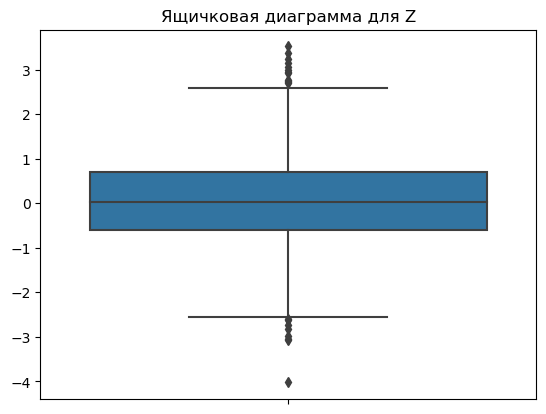

Фактическое количество выбросов: 20


In [14]:
sb.boxplot(y = Z_values)
plt.title("Ящичковая диаграмма для Z")
plt.show()
q1 = np.percentile(Z_values, 25)
q3 = np.percentile(Z_values, 75)
iqr = q3 - q1

# Вычисляем границы для усов
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = []
for i in Z_values:
    if i < lower_bound or i > upper_bound:
        outliers.append(i)
num_outliers = len(outliers)
print(f"Фактическое количество выбросов: {num_outliers}")